  Using cached statsmodels-0.14.4-cp39-cp39-win_amd64.whl.metadata (9.5 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached statsmodels-0.14.4-cp39-cp39-win_amd64.whl (9.9 MB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)


C:\Users\swath\anaconda3\envs\ocean_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\swath\anaconda3\envs\ocean_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\swath\anaconda3\envs\ocean_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\swath\anaconda3\envs\ocean_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueW

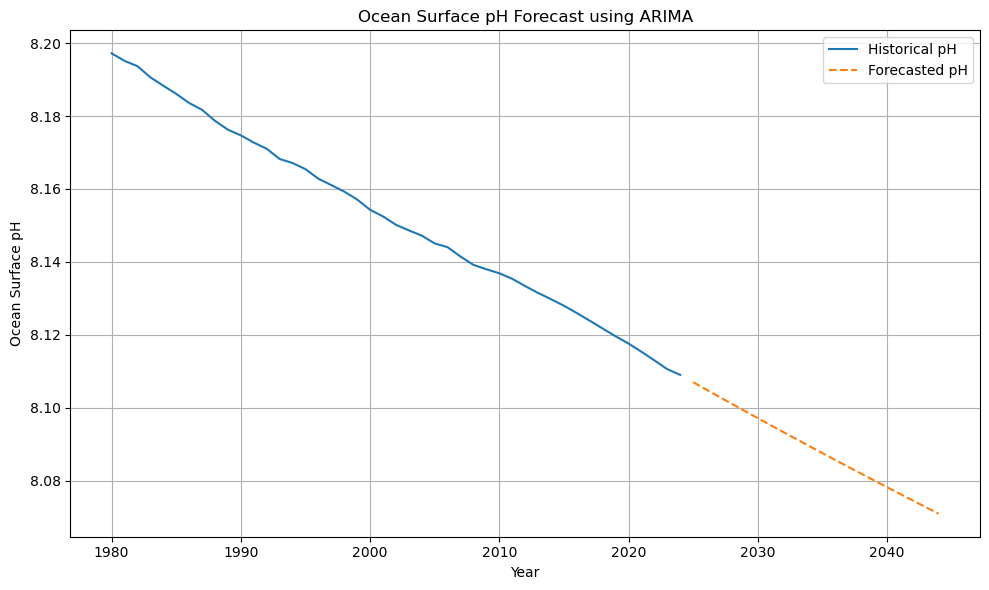

In [3]:
!pip install pandas matplotlib statsmodels

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load dataset
df = pd.read_csv("Ocean_Acidification_Dataset.csv")

# Set 'Year' as the index
df.set_index("Year", inplace=True)

# Extract pH values
ph_series = df["Ocean_Surface_pH"]

# Fit ARIMA model 
model = ARIMA(ph_series, order=(1, 1, 1))  # (p, d, q)
fitted_model = model.fit()

# Forecast next 20 years
forecast = fitted_model.forecast(steps=20)

# Create future years index
future_years = list(range(df.index.max() + 1, df.index.max() + 21))

# Plotting the historical and forecasted pH
plt.figure(figsize=(10, 6))
plt.plot(df.index, ph_series, label="Historical pH")
plt.plot(future_years, forecast, label="Forecasted pH", linestyle='--')
plt.xlabel("Year")
plt.ylabel("Ocean Surface pH")
plt.title("Ocean Surface pH Forecast using ARIMA")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


df = pd.read_csv("Ocean_Acidification_Dataset.csv")

# Convert 'Year' to datetime and set as index
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

# Use ocean surface pH as the target time series
ts = df['Ocean_Surface_pH']

# Fit ARIMA model (tune order as needed)
model = ARIMA(ts, order=(2, 1, 1))
model_fit = model.fit()

# Predict in-sample (excluding first diffed value)
y_pred = model_fit.predict(start=1, end=len(ts)-1, typ='levels')
y_true = ts.iloc[1:]

# Evaluate accuracy
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print results
print(f"Mean Squared Error (MSE): {mse:.8f}")
print(f"Mean Absolute Error (MAE): {mae:.5f}")
print(f"R² Score (ARIMA accuracy): {r2:.4f}")


Mean Squared Error (MSE): 0.00000038
Mean Absolute Error (MAE): 0.00046
R² Score (ARIMA accuracy): 0.9994


C:\Users\swath\anaconda3\envs\ocean_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\swath\anaconda3\envs\ocean_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\swath\anaconda3\envs\ocean_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\swath\anaconda3\envs\ocean_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
